<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 2: Analyzing IMDb Data

_Author: Kevin Markham (DC)_

---

For project two, you will complete a series of exercises exploring movie rating data from IMDb.

For these exercises, you will be conducting basic exploratory data analysis on IMDB's movie data, looking to answer such questions as:

What is the average rating per genre?
How many different actors are in a movie?

This process will help you practice your data analysis skills while becoming comfortable with Pandas.

## Basic level

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#### Read in 'imdb_1000.csv' and store it in a DataFrame named movies.

In [2]:
movies = pd.read_csv('./data/imdb_1000.csv')
movies.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


#### Check the number of rows and columns.

In [3]:
# Answer:
movies.shape


(979, 6)

#### Check the data type of each column.

In [4]:
# Answer:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 979 entries, 0 to 978
Data columns (total 6 columns):
star_rating       979 non-null float64
title             979 non-null object
content_rating    976 non-null object
genre             979 non-null object
duration          979 non-null int64
actors_list       979 non-null object
dtypes: float64(1), int64(1), object(4)
memory usage: 46.0+ KB


#### Calculate the average movie duration.

In [5]:
# Answer:
movies['duration'].mean()

120.97957099080695

#### Sort the DataFrame by duration to find the shortest and longest movies.

In [6]:
# Answer:
movies.sort_values('duration')


,star_rating,title,content_rating,genre,duration,actors_list
389,8.0,Freaks,UNRATED,Drama,64,"[u'Wallace Ford', u'Leila Hyams', u'Olga Bacla..."
338,8.0,Battleship Potemkin,UNRATED,History,66,"[u'Aleksandr Antonov', u'Vladimir Barsky', u'G..."
258,8.1,The Cabinet of Dr. Caligari,UNRATED,Crime,67,"[u'Werner Krauss', u'Conrad Veidt', u'Friedric..."
293,8.1,Duck Soup,PASSED,Comedy,68,"[u'Groucho Marx', u'Harpo Marx', u'Chico Marx']"
88,8.4,The Kid,NOT RATED,Comedy,68,"[u'Charles Chaplin', u'Edna Purviance', u'Jack..."
742,7.6,Following,R,Mystery,69,"[u'Jeremy Theobald', u'Alex Haw', u'Lucy Russe..."
351,8.0,Frankenstein,UNRATED,Horror,70,"[u'Colin Clive', u'Mae Clarke', u'Boris Karloff']"
938,7.4,Alice in Wonderland,G,Animation,75,"[u'Kathryn Beaumont', u'Ed Wynn', u'Richard Ha..."
405,7.9,The Bride of Frankenstein,NOT RATED,Horror,75,"[u'Boris Karloff', u'Elsa Lanchester', u'Colin..."
303,8.0,The Nightmare Before Christmas,PG,Animation,76,"[u'Danny Elfman', u'Chris Sarandon', u""Catheri..."


In [7]:
movies['duration'].max()

242

In [8]:
print(movies['duration'].min())

64


#### Create a histogram of duration, choosing an "appropriate" number of bins.

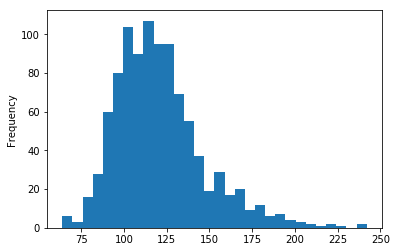

In [9]:
# Answer:
movies.duration.plot(kind='hist', bins=30)

#### Use a box plot to display that same data.

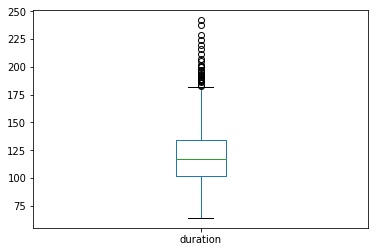

In [10]:
# Answer:
movies.duration.plot(kind='box');

## Intermediate level

#### Count how many movies have each of the content ratings.

In [11]:
# Answer:
#movies.groupby('content_rating').count()
movies.content_rating.value_counts()

R            460
PG-13        189
PG           123
NOT RATED     65
APPROVED      47
UNRATED       38
G             32
NC-17          7
PASSED         7
X              4
GP             3
TV-MA          1
Name: content_rating, dtype: int64

#### Use a visualization to display that same data, including a title and x and y labels.

Text(0.5, 0, 'Content rating')

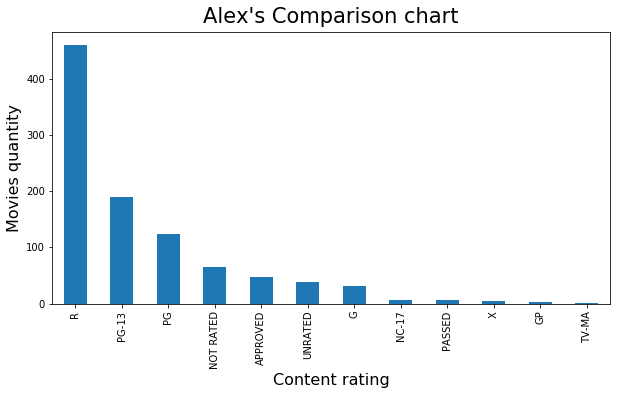

In [12]:
# Answer:
#movies.groupby('content_rating').count().drop('star_rating',axis=1).plot(kind='bar') no working that well.

ax= movies.content_rating.value_counts().plot(kind='bar', figsize=(10,5))

ax.set_title("Alex's Comparison chart", fontsize=21, y=1.01)

ax.set_ylabel('Movies quantity', fontsize=16)
ax.set_xlabel('Content rating', fontsize=16)

#### Convert the following content ratings to "UNRATED": NOT RATED, APPROVED, PASSED, GP.

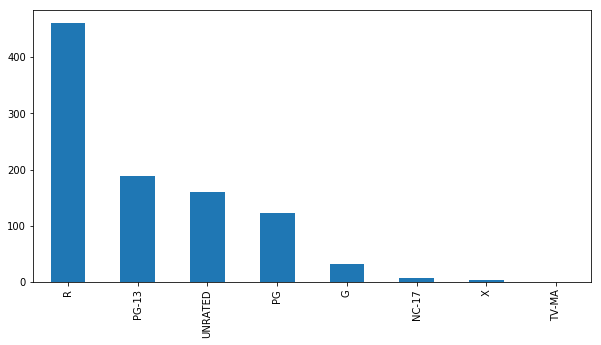

In [13]:
# Answer:
movies.content_rating.replace(['NOT RATED','APPROVED','PASSED','GP'],['UNRATED','UNRATED','UNRATED','UNRATED']).value_counts().plot(kind='bar', figsize=(10,5))

#ploting it to confirm they have been converted, ok!

#### Convert the following content ratings to "NC-17": X, TV-MA.

In [14]:
# Answer:
movies.content_rating.replace(['X','TV-MA'],['NC-17','NC-17']).value_counts()

R            460
PG-13        189
PG           123
NOT RATED     65
APPROVED      47
UNRATED       38
G             32
NC-17         12
PASSED         7
GP             3
Name: content_rating, dtype: int64

#### Count the number of missing values in each column.

In [15]:
# Answer:
#movies.info() this works also but not as good as .isnull().sum()
movies.isnull().sum()

star_rating       0
title             0
content_rating    3
genre             0
duration          0
actors_list       0
dtype: int64

#### If there are missing values: examine them, then fill them in with "reasonable" values.

In [16]:
# Answer:

movies = movies.fillna("UNRATED")


movies.isnull().sum()


star_rating       0
title             0
content_rating    0
genre             0
duration          0
actors_list       0
dtype: int64

#### Calculate the average star rating for movies 2 hours or longer, and compare that with the average star rating for movies shorter than 2 hours.

In [28]:
# Answer:
movies_2hrs_plus = movies[movies['duration']>120]
a = movies_2hrs_plus.star_rating.mean()

movies_2hrs_less = movies[movies['duration']<120]
b = movies_2hrs_less.star_rating.mean()

print("Star rating average for 2 hrs plus movies is:",a," , less than 2 hrs is: ",b)


Star rating average for 2 hrs plus movies is: 7.953669724770622  , less than 2 hrs is:  7.838666666666657


#### Use a visualization to detect whether there is a relationship between duration and star rating.

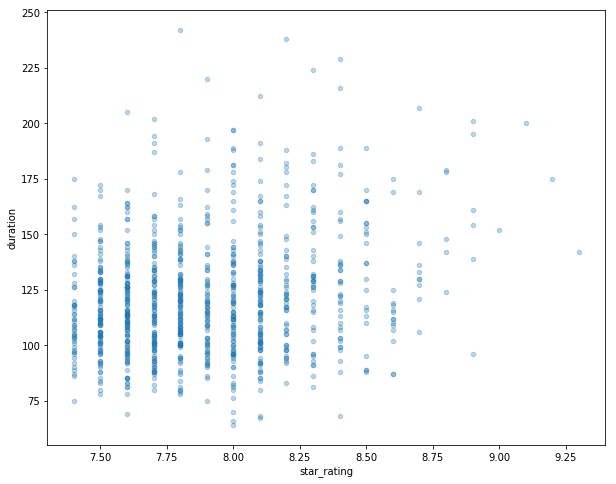

In [29]:
# Answer:

movies.plot(kind='scatter', x='star_rating', y='duration',alpha=0.3, figsize=(10, 8))

#### Calculate the average duration for each genre.

In [48]:
# Answer:
movies[['duration','genre']].groupby(by='genre').mean()

#movies.pivot_table(index = 'genre',values = ['duration'],aggfunc='mean')     Another way to do it :)

,duration
genre,
Action,126.485294
Adventure,134.840000
Animation,96.596774
Biography,131.844156
Comedy,107.602564
Crime,122.298387
Drama,126.539568
Family,107.500000
Fantasy,112.000000


## Advanced level

#### Visualize the relationship between content rating and duration.

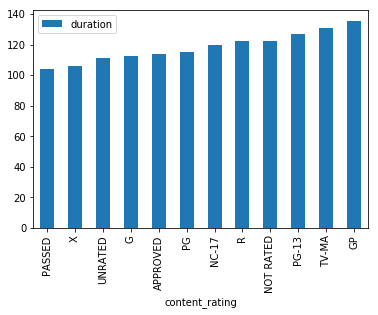

In [40]:
# Answer: Not sure how to visualize... pending...
rel = movies[['duration','content_rating']].groupby(by='content_rating').mean() #calculated the mean of duration for each genre


rel.sort_values('duration').plot(kind='bar') #plotted that result and sorted it by duration, is this what we are supposed to do?


#### Determine the top rated movie (by star rating) for each genre.

In [49]:
# Answer:
movies[['star_rating','genre','title']].groupby(by='genre').max()



,star_rating,title
genre,,
Action,9.0,Yojimbo
Adventure,8.9,True Grit
Animation,8.6,Wreck-It Ralph
Biography,8.9,Walk the Line
Comedy,8.6,Zombieland
Crime,9.3,Zodiac
Drama,8.9,Zulu
Family,7.9,Willy Wonka & the Chocolate Factory
Fantasy,7.7,The City of Lost Children


#### Check if there are multiple movies with the same title, and if so, determine if they are actually duplicates.

In [95]:
# Answer:


dups = movies[movies.title.duplicated()] #Yes there movies with the same title
 

for a in movies.title:
    for b in dups.title:
        if a == b:
            print(a,' ',b) 
   

The Girl with the Dragon Tattoo   The Girl with the Dragon Tattoo
The Girl with the Dragon Tattoo   The Girl with the Dragon Tattoo
True Grit   True Grit
Les Miserables   Les Miserables
Dracula   Dracula
Dracula   Dracula
Les Miserables   Les Miserables
True Grit   True Grit


In [98]:
dupsb = movies[movies.duplicated()] 
 
dupsb #nothing comeas up, meaning that the whole record is not duplicated, only the titles

#for a in movies.title:
    #for b in dupsb.title:
        #if a == b:
            #print('something') 
   

,star_rating,title,content_rating,genre,duration,actors_list


#### Calculate the average star rating for each genre, but only include genres with at least 10 movies


#### Option 1: manually create a list of relevant genres, then filter using that list

In [223]:
# Answer:

manual_list = ('Drama','Comedy','Action','Crime','Biography','Adventure','Animation','Horror','Mystery')#Create manual list


movies_manual = movies[movies['genre'].isin(manual_list)] #creates new data frame only with Genres in our manual list


movies_manual[['star_rating','genre']].groupby(by='genre').mean() # get the mean n=by genre of that new dataframe 




,star_rating
genre,
Action,7.884559
Adventure,7.933333
Animation,7.914516
Biography,7.862338
Comedy,7.822436
Crime,7.916935
Drama,7.902518
Horror,7.806897
Mystery,7.975000


#### Option 2: automatically create a list of relevant genres by saving the value_counts and then filtering

In [227]:
# Answer:
list = movies.genre.value_counts()

for n in range(len(list)):
    if lista[n]>10:
        auto_list[n] = lista.index[n]
    
auto_list
    
#new_list = tuple(list)

#auto_list=list[list>10]



##al = pd.DataFrame(auto_list)
##al.rename(columns = {'genre','counts'})

#movies_auto = movies[movies['genre'].isin(al)]
#movies_m

#movies_auto[['star_rating','genre']].groupby(by='genre').mean()


TypeError: 'str' object does not support item assignment

In [222]:
movies.genre.value_counts() #using this just to see what values are in our new list

Drama        278
Comedy       156
Action       136
Crime        124
Biography     77
Adventure     75
Animation     62
Horror        29
Mystery       16
Western        9
Sci-Fi         5
Thriller       5
Film-Noir      3
Family         2
History        1
Fantasy        1
Name: genre, dtype: int64

#### Option 3: calculate the average star rating for all genres, then filter using a boolean Series

In [247]:
# Answer:

movies[['star_rating','genre']].groupby(by='genre').mean()




#movies.groupby('genre')['star_rating'].mean()

,star_rating
genre,
Action,7.884559
Adventure,7.933333
Animation,7.914516
Biography,7.862338
Comedy,7.822436
Crime,7.916935
Drama,7.902518
Family,7.850000
Fantasy,7.700000


#### Option 4: aggregate by count and mean, then filter using the count

In [26]:
# Answer:

## Bonus

#### Figure out something "interesting" using the actors data!